In [640]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
pd.set_option('display.max_columns', 150) # displays all columns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder

/kaggle/input/churn-telecomm/train.csv
/kaggle/input/dfc-state/DFC_STATE.csv


# Dimensionality Reduction - PCA

# 01 - Data Preparation

In [642]:
# Load the training data from the specified address
train_original = pd.read_csv('/kaggle/input/dfc-state/DFC_STATE.csv')

In [643]:
# Create a working copy of the original DataFrame
train_data = train_original.copy()

# Print basic dataset info
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 39 columns):
 #   Column                                                                                   Non-Null Count  Dtype  
---  ------                                                                                   --------------  -----  
 0   State                                                                                    56 non-null     object 
 1   Transfusions- Better than expected (STATE)                                               56 non-null     int64  
 2   Transfusions- As expected (STATE)                                                        56 non-null     int64  
 3   Transfusions- Worse than expected (STATE)                                                56 non-null     int64  
 4   Infection- Better than expected (STATE)                                                  56 non-null     int64  
 5   Infection- As expected (STATE)                                    

In [644]:
train_data.columns

Index(['State', 'Transfusions- Better than expected (STATE)',
       'Transfusions- As expected (STATE)',
       'Transfusions- Worse than expected (STATE)',
       'Infection- Better than expected (STATE)',
       'Infection- As expected (STATE)',
       'Infection- Worse than expected (STATE)',
       'Percentage of adult HD patients with Kt/V>=1.2',
       'Percentage Of Adult PD Patients With Kt/V>=1.7',
       'Percentage Of Pediatric HD Patients With Kt/V>=1.2',
       'Percentage Of Pediatric PD Patients With Kt/V>=1.8',
       'Percentage Of Pediatric HD Patients With nPCR In Use',
       'Fistula Rate - Better Than Expected (STATE)',
       'Fistula Rate - As Expected (STATE)',
       'Fistula Rate - Worse Than Expected (STATE)',
       'Percentage Of Adult Patients With Long Term Catheter In Use',
       'Percentage Of Adult Patients With Hypercalcemia (Serum Calcium Greater Than 10.2 Mg/dL)',
       'Percentage Of Adult Patients With Serum Phosphorus Less Than 3.5 Mg/dL',
  

In [645]:
train_data.head(3)

,State,Transfusions- Better than expected (STATE),Transfusions- As expected (STATE),Transfusions- Worse than expected (STATE),Infection- Better than expected (STATE),Infection- As expected (STATE),Infection- Worse than expected (STATE),Percentage of adult HD patients with Kt/V>=1.2,Percentage Of Adult PD Patients With Kt/V>=1.7,Percentage Of Pediatric HD Patients With Kt/V>=1.2,Percentage Of Pediatric PD Patients With Kt/V>=1.8,Percentage Of Pediatric HD Patients With nPCR In Use,Fistula Rate - Better Than Expected (STATE),Fistula Rate - As Expected (STATE),Fistula Rate - Worse Than Expected (STATE),Percentage Of Adult Patients With Long Term Catheter In Use,Percentage Of Adult Patients With Hypercalcemia (Serum Calcium Greater Than 10.2 Mg/dL),Percentage Of Adult Patients With Serum Phosphorus Less Than 3.5 Mg/dL,Percentage Of Adult Patients With Serum Phosphorus Between 3.5-4.5 Mg/dL,Percentage Of Adult Patients With Serum Phosphorus Between 4.6-5.5 Mg/dL,Percentage Of Adult Patients With Serum Phosphorus Between 5.6-7.0 Mg/dL,Percentage Of Adult Patients With Serum Phosphorus Greater Than 7.0 Mg/dL,Hospitalizations- Better Than Expected (STATE),Hospitalizations- As Expected (STATE),Hospitalizations- Worse Than Expected (STATE),Hospital Readmission - Better Than Expected (STATE),Hospital Readmission - As Expected (STATE),Hospital Readmission - Worse Than Expected (STATE),Survival- Better Than Expected (STATE),Survival- As Expected (STATE),Survival- Worse Than Expected (STATE),Incident Patients Transplant Waitlisting- Better Than Expected (STATE),Incident Patients Transplant Waitlisting - As Expected (STATE),Incident Patients Transplant Waitlisting - Worse Than Expected (STATE),Prevalent Patients Transplant Waitlisting- Better Than Expected (STATE),Prevalent Patients Transplant Waitlisting - As Expected (STATE),Prevalent Patients Transplant Waitlisting - Worse Than Expected (STATE),Percentage Of Patients With Hgb<10 g/dL,Percentage of patients with Hgb>12 g/dL
0,AK,0,7,1,3,6,0,97.0,93.0,100.0,NaN,100.0,1,8,0,13.0,1.0,9.0,26.0,25.0,23.0,17.0,0,9,0,0,7,0,0,9,0,1,2,1,1,8,0,18.0,0.0
1,AL,0,133,10,39,116,0,96.0,94.0,88.0,81.0,88.0,8,148,14,11.0,1.0,8.0,21.0,28.0,24.0,19.0,3,168,1,8,156,3,3,162,4,2,69,3,2,171,3,23.0,0.0
2,AR,0,41,16,24,35,0,96.0,91.0,95.0,97.0,93.0,2,59,4,20.0,2.0,7.0,20.0,28.0,24.0,21.0,2,60,3,1,61,2,1,62,1,0,37,3,0,57,7,20.0,1.0


In [646]:
# Drop null records
train_data = train_data.dropna()

# Drop unecessary features
#train_data = train_data.drop(['ID'], axis=1)

# Check for null values
train_data.isnull().sum()

State                                                                                      0
Transfusions- Better than expected (STATE)                                                 0
Transfusions- As expected (STATE)                                                          0
Transfusions- Worse than expected (STATE)                                                  0
Infection- Better than expected (STATE)                                                    0
Infection- As expected (STATE)                                                             0
Infection- Worse than expected (STATE)                                                     0
Percentage of adult HD patients with Kt/V>=1.2                                             0
Percentage Of Adult PD Patients With Kt/V>=1.7                                             0
Percentage Of Pediatric HD Patients With Kt/V>=1.2                                         0
Percentage Of Pediatric PD Patients With Kt/V>=1.8                    

In [647]:
# Check duplicated rows, or records

train_data.loc[train_data.duplicated()]

,State,Transfusions- Better than expected (STATE),Transfusions- As expected (STATE),Transfusions- Worse than expected (STATE),Infection- Better than expected (STATE),Infection- As expected (STATE),Infection- Worse than expected (STATE),Percentage of adult HD patients with Kt/V>=1.2,Percentage Of Adult PD Patients With Kt/V>=1.7,Percentage Of Pediatric HD Patients With Kt/V>=1.2,Percentage Of Pediatric PD Patients With Kt/V>=1.8,Percentage Of Pediatric HD Patients With nPCR In Use,Fistula Rate - Better Than Expected (STATE),Fistula Rate - As Expected (STATE),Fistula Rate - Worse Than Expected (STATE),Percentage Of Adult Patients With Long Term Catheter In Use,Percentage Of Adult Patients With Hypercalcemia (Serum Calcium Greater Than 10.2 Mg/dL),Percentage Of Adult Patients With Serum Phosphorus Less Than 3.5 Mg/dL,Percentage Of Adult Patients With Serum Phosphorus Between 3.5-4.5 Mg/dL,Percentage Of Adult Patients With Serum Phosphorus Between 4.6-5.5 Mg/dL,Percentage Of Adult Patients With Serum Phosphorus Between 5.6-7.0 Mg/dL,Percentage Of Adult Patients With Serum Phosphorus Greater Than 7.0 Mg/dL,Hospitalizations- Better Than Expected (STATE),Hospitalizations- As Expected (STATE),Hospitalizations- Worse Than Expected (STATE),Hospital Readmission - Better Than Expected (STATE),Hospital Readmission - As Expected (STATE),Hospital Readmission - Worse Than Expected (STATE),Survival- Better Than Expected (STATE),Survival- As Expected (STATE),Survival- Worse Than Expected (STATE),Incident Patients Transplant Waitlisting- Better Than Expected (STATE),Incident Patients Transplant Waitlisting - As Expected (STATE),Incident Patients Transplant Waitlisting - Worse Than Expected (STATE),Prevalent Patients Transplant Waitlisting- Better Than Expected (STATE),Prevalent Patients Transplant Waitlisting - As Expected (STATE),Prevalent Patients Transplant Waitlisting - Worse Than Expected (STATE),Percentage Of Patients With Hgb<10 g/dL,Percentage of patients with Hgb>12 g/dL


In [648]:
# Descriptive statistics for numerical features
train_data.describe()

,Transfusions- Better than expected (STATE),Transfusions- As expected (STATE),Transfusions- Worse than expected (STATE),Infection- Better than expected (STATE),Infection- As expected (STATE),Infection- Worse than expected (STATE),Percentage of adult HD patients with Kt/V>=1.2,Percentage Of Adult PD Patients With Kt/V>=1.7,Percentage Of Pediatric HD Patients With Kt/V>=1.2,Percentage Of Pediatric PD Patients With Kt/V>=1.8,Percentage Of Pediatric HD Patients With nPCR In Use,Fistula Rate - Better Than Expected (STATE),Fistula Rate - As Expected (STATE),Fistula Rate - Worse Than Expected (STATE),Percentage Of Adult Patients With Long Term Catheter In Use,Percentage Of Adult Patients With Hypercalcemia (Serum Calcium Greater Than 10.2 Mg/dL),Percentage Of Adult Patients With Serum Phosphorus Less Than 3.5 Mg/dL,Percentage Of Adult Patients With Serum Phosphorus Between 3.5-4.5 Mg/dL,Percentage Of Adult Patients With Serum Phosphorus Between 4.6-5.5 Mg/dL,Percentage Of Adult Patients With Serum Phosphorus Between 5.6-7.0 Mg/dL,Percentage Of Adult Patients With Serum Phosphorus Greater Than 7.0 Mg/dL,Hospitalizations- Better Than Expected (STATE),Hospitalizations- As Expected (STATE),Hospitalizations- Worse Than Expected (STATE),Hospital Readmission - Better Than Expected (STATE),Hospital Readmission - As Expected (STATE),Hospital Readmission - Worse Than Expected (STATE),Survival- Better Than Expected (STATE),Survival- As Expected (STATE),Survival- Worse Than Expected (STATE),Incident Patients Transplant Waitlisting- Better Than Expected (STATE),Incident Patients Transplant Waitlisting - As Expected (STATE),Incident Patients Transplant Waitlisting - Worse Than Expected (STATE),Prevalent Patients Transplant Waitlisting- Better Than Expected (STATE),Prevalent Patients Transplant Waitlisting - As Expected (STATE),Prevalent Patients Transplant Waitlisting - Worse Than Expected (STATE),Percentage Of Patients With Hgb<10 g/dL,Percentage of patients with Hgb>12 g/dL
count,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.00000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000
mean,0.162791,125.581395,9.093023,50.837209,93.232558,1.418605,96.651163,92.186047,90.162791,75.418605,90.511628,6.116279,147.488372,6.674419,16.534884,1.697674,7.627907,23.418605,29.511628,23.255814,16.209302,1.488372,155.651163,6.27907,3.023256,151.418605,4.511628,4.465116,150.255814,5.279070,5.976744,77.930233,3.511628,10.046512,153.209302,3.395349,20.441860,0.232558
std,0.484534,125.829104,10.030463,58.221633,82.899491,1.841746,1.043887,2.905297,10.623268,20.744744,14.445912,10.452180,143.445588,8.930208,3.209724,0.831948,0.817174,1.546618,1.297839,1.114686,2.335626,2.472439,150.671020,11.96687,3.432952,149.662833,6.843043,5.483086,147.841790,6.522217,10.762564,90.164505,6.130999,27.559419,150.032942,3.761582,3.534202,0.427463
min,0.000000,13.000000,0.000000,2.000000,11.000000,0.000000,94.000000,82.000000,47.000000,8.000000,15.000000,0.000000,16.000000,0.000000,10.000000,1.000000,6.000000,20.000000,27.000000,20.000000,9.000000,0.000000,16.000000,0.00000,0.000000,15.000000,0.000000,0.000000,15.000000,0.000000,0.000000,2.000000,0.000000,0.000000,11.000000,0.000000,11.000000,0.000000
25%,0.000000,42.000000,2.000000,17.000000,33.000000,0.000000,96.000000,90.000000,86.000000,64.500000,88.500000,1.000000,47.500000,0.000000,15.000000,1.000000,7.000000,22.500000,29.000000,22.500000,15.000000,0.000000,52.500000,0.00000,1.000000,49.500000,1.000000,1.000000,50.000000,1.000000,1.000000,25.000000,0.000000,1.000000,47.000000,1.000000,18.000000,0.000000
50%,0.000000,86.000000,6.000000,29.000000,80.000000,1.000000,97.000000,93.000000,91.000000,80.000000,94.000000,2.000000,110.000000,3.000000,17.000000,2.000000

In [649]:
# Descriptive statistics for categorical features
train_data.describe(include = "object")

,State
count,43
unique,43
top,AL
freq,1


# 02 - EDA

In [650]:
# import ydata_profiling

# # Create EDA report
# eda_report = ydata_profiling.ProfileReport(train_original)
# #eda_report

# # Export the report to a file
# eda_report.to_file("dialysis_eda_report.html")

# 03 - Feature Engineering
## Create the X, Y matrices

In [651]:
# Define features X-matrix
X = train_data.drop(['Survival- As Expected (STATE)', 'State'], axis=1)

# Define target y-matrix
y = train_data['Survival- As Expected (STATE)']

# Records comparison for the X-matrix, Y-matrix
train_data.shape, X.shape, y.shape

((43, 39), (43, 37), (43,))

In [652]:
X.head()

,Transfusions- Better than expected (STATE),Transfusions- As expected (STATE),Transfusions- Worse than expected (STATE),Infection- Better than expected (STATE),Infection- As expected (STATE),Infection- Worse than expected (STATE),Percentage of adult HD patients with Kt/V>=1.2,Percentage Of Adult PD Patients With Kt/V>=1.7,Percentage Of Pediatric HD Patients With Kt/V>=1.2,Percentage Of Pediatric PD Patients With Kt/V>=1.8,Percentage Of Pediatric HD Patients With nPCR In Use,Fistula Rate - Better Than Expected (STATE),Fistula Rate - As Expected (STATE),Fistula Rate - Worse Than Expected (STATE),Percentage Of Adult Patients With Long Term Catheter In Use,Percentage Of Adult Patients With Hypercalcemia (Serum Calcium Greater Than 10.2 Mg/dL),Percentage Of Adult Patients With Serum Phosphorus Less Than 3.5 Mg/dL,Percentage Of Adult Patients With Serum Phosphorus Between 3.5-4.5 Mg/dL,Percentage Of Adult Patients With Serum Phosphorus Between 4.6-5.5 Mg/dL,Percentage Of Adult Patients With Serum Phosphorus Between 5.6-7.0 Mg/dL,Percentage Of Adult Patients With Serum Phosphorus Greater Than 7.0 Mg/dL,Hospitalizations- Better Than Expected (STATE),Hospitalizations- As Expected (STATE),Hospitalizations- Worse Than Expected (STATE),Hospital Readmission - Better Than Expected (STATE),Hospital Readmission - As Expected (STATE),Hospital Readmission - Worse Than Expected (STATE),Survival- Better Than Expected (STATE),Survival- Worse Than Expected (STATE),Incident Patients Transplant Waitlisting- Better Than Expected (STATE),Incident Patients Transplant Waitlisting - As Expected (STATE),Incident Patients Transplant Waitlisting - Worse Than Expected (STATE),Prevalent Patients Transplant Waitlisting- Better Than Expected (STATE),Prevalent Patients Transplant Waitlisting - As Expected (STATE),Prevalent Patients Transplant Waitlisting - Worse Than Expected (STATE),Percentage Of Patients With Hgb<10 g/dL,Percentage of patients with Hgb>12 g/dL
1,0,133,10,39,116,0,96.0,94.0,88.0,81.0,88.0,8,148,14,11.0,1.0,8.0,21.0,28.0,24.0,19.0,3,168,1,8,156,3,3,4,2,69,3,2,171,3,23.0,0.0
2,0,41,16,24,35,0,96.0,91.0,95.0,97.0,93.0,2,59,4,20.0,2.0,7.0,20.0,28.0,24.0,21.0,2,60,3,1,61,2,1,1,0,37,3,0,57,7,20.0,1.0
4,0,99,3,50,68,0,97.0,94.0,98.0,86.0,99.0,3,119,0,15.0,1.0,8.0,23.0,29.0,22.0,18.0,0,120,3,3,119,0,1,6,0,83,11,0,119,6,17.0,0.0
5,2,596,15,290,298,1,97.0,88.0,87.0,61.0,91.0,44,593,12,15.0,2.0,8.0,24.0,31.0,22.0,16.0,15,675,6,17,645,15,11,23,52,400,34,168,550,1,16.0,1.0
6,0,52,4,20,52,1,98.0,91.0,89.0,64.0,99.0,12,68,0,14.0,1.0,7.0,24.0,30.0,23.0,15.0,0,80,0,3,72,1,2,1,5,35,0,4,77,2,22.0,1.0


## Feature Scaling

In [653]:
# Standardization
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

## Logistic Regression - Full Model

In [654]:
random_state = 95
X_train, X_test, y_train, y_test = \
    train_test_split(X, y,
                     test_size = 0.3,
                     shuffle = True,
                     random_state=random_state)
#---train the model using Multiple Linear Regression---
log_reg = LinearRegression()
log_reg.fit(X_train, y_train)
#---evaluate the model---
log_reg.score(X_test,y_test)

0.9959280985297583

## PCA to X-matrix

In [655]:
from sklearn.decomposition import PCA
components = None
pca = PCA(n_components = components)
# perform PCA on the scaled data
pca.fit(X_scaled)

PCA()

In [656]:
# print the explained variances
print("Variances (Percentage):")
print(pca.explained_variance_ratio_ * 100)
print()

Variances (Percentage):
[3.95867072e+01 1.22429920e+01 9.67117697e+00 7.17884687e+00
 5.96114002e+00 4.14639915e+00 3.46788521e+00 2.91318299e+00
 2.27434324e+00 1.90251913e+00 1.67451804e+00 1.32272748e+00
 1.19951227e+00 1.17731653e+00 9.01362073e-01 8.39101611e-01
 6.83702639e-01 5.13896184e-01 4.68799050e-01 3.79783977e-01
 3.20603604e-01 2.59647860e-01 2.10858542e-01 1.85405184e-01
 1.72146520e-01 1.20392406e-01 8.01488672e-02 6.58287616e-02
 4.04023124e-02 1.56163301e-02 1.49564888e-02 4.59512611e-03
 2.18392320e-03 1.01683310e-03 1.82241156e-04 7.18495217e-05
 3.04997820e-05]



In [657]:
print("Cumulative Variances (Percentage):")
print(pca.explained_variance_ratio_.cumsum() * 100)
print()

Cumulative Variances (Percentage):
[ 39.58670722  51.82969921  61.50087618  68.67972305  74.64086307
  78.78726222  82.25514743  85.16833042  87.44267367  89.3451928
  91.01971084  92.34243832  93.54195059  94.71926712  95.62062919
  96.4597308   97.14343344  97.65732963  98.12612868  98.50591265
  98.82651626  99.08616412  99.29702266  99.48242784  99.65457436
  99.77496677  99.85511563  99.9209444   99.96134671  99.97696304
  99.99191953  99.99651465  99.99869858  99.99971541  99.99989765
  99.9999695  100.        ]



Text(0, 0.5, 'Explained variance (%)')

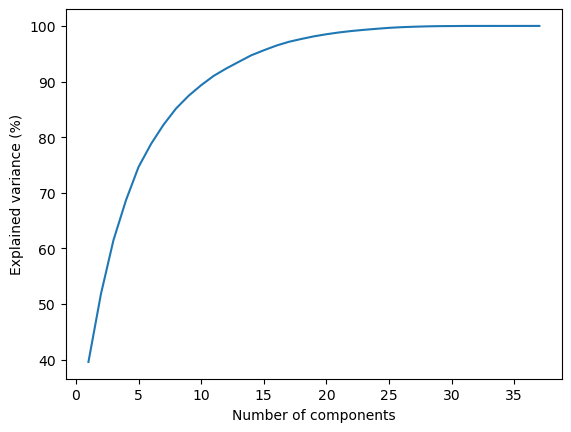

In [658]:
import matplotlib.pyplot as plt

# scree plot
components = len(pca.explained_variance_ratio_) \
    if components is None else components
plt.plot(range(1,components+1), 
         np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Number of components")
plt.ylabel("Explained variance (%)")

<font size='5'>Let’s now apply PCA to find the desired number of components based on the desired explained variance.<font>

Cumulative Variances (Percentage):
[39.58670722 51.82969921 61.50087618 68.67972305 74.64086307 78.78726222
 82.25514743 85.16833042 87.44267367]
Number of components: 9


Text(0, 0.5, 'Explained variance (%)')

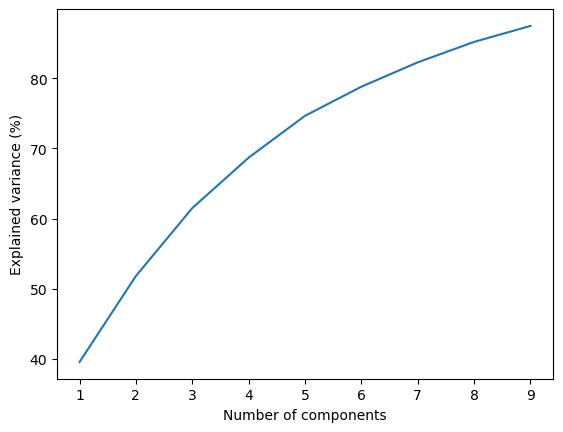

In [659]:
pca = PCA(n_components = 0.86)
pca.fit(X_scaled)
print("Cumulative Variances (Percentage):")
print(np.cumsum(pca.explained_variance_ratio_ * 100))
components = len(pca.explained_variance_ratio_)
print(f'Number of components: {components}')
# Make the scree plot
plt.plot(range(1, components + 1), np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Number of components")
plt.ylabel("Explained variance (%)")

<font size='5'>You can also find out the importance of each feature that contributes to each of the components using the components_ attribute of the pca object<font>

In [660]:
pca_components = abs(pca.components_)
print(pca_components)

[[7.40395447e-02 2.56692737e-01 2.01105440e-01 2.56098117e-01
  2.46708421e-01 1.27579730e-01 7.76916735e-02 7.00089738e-02
  4.83996301e-02 2.72698251e-02 4.06174082e-02 1.66944097e-01
  2.54926221e-01 1.88569092e-01 3.29272539e-02 7.54720357e-02
  1.38665446e-02 2.34939406e-02 5.66427991e-02 5.73190579e-02
  1.59421498e-02 1.53244900e-01 2.56540879e-01 1.86048318e-01
  2.05669440e-01 2.56863976e-01 1.97601039e-01 1.37890660e-01
  2.28837771e-01 2.03292779e-01 2.52460419e-01 1.93135471e-01
  1.63879974e-01 2.52301680e-01 1.07429855e-01 6.89217406e-03
  3.17067242e-03]
 [2.41337199e-01 1.32106437e-02 2.02752538e-01 1.65469994e-02
  8.05071531e-02 1.29958875e-02 1.09360574e-01 2.51063085e-02
  1.40006830e-01 1.82478932e-02 1.65541600e-01 1.92910793e-01
  5.70641760e-02 6.02463718e-02 1.05881230e-02 8.03992769e-02
  2.56348230e-01 3.66443678e-01 3.27602493e-01 3.42716779e-01
  3.50517119e-01 9.60597019e-02 3.47119904e-02 1.02127385e-01
  3.03908057e-02 4.09173312e-02 2.36766410e-02 1.434

<font size='5'>The importance of each feature is reflected by the magnitude of the corresponding values in the output — the higher magnitude, the higher the importance.<font>

In [661]:
print('Top 4 most important features in each component')
print('===============================================')
for row in range(pca_components.shape[0]):
    # get the indices of the top 4 values in each row
    temp = np.argpartition(-(pca_components[row]), 4)
    
    # sort the indices in descending order
    indices = temp[np.argsort((-pca_components[row])[temp])][:4]
    
    # print the top 4 feature names
    print(f'Component {row}: {train_data.columns[indices].to_list()}')

Top 4 most important features in each component
Component 0: ['Hospital Readmission - Better Than Expected (STATE)', 'Transfusions- Better than expected (STATE)', 'Hospitalizations- Better Than Expected (STATE)', 'Transfusions- Worse than expected (STATE)']
Component 1: ['Percentage Of Adult Patients With Serum Phosphorus Less Than 3.5 Mg/dL', 'Percentage Of Adult Patients With Serum Phosphorus Between 5.6-7.0 Mg/dL', 'Percentage Of Adult Patients With Serum Phosphorus Between 4.6-5.5 Mg/dL', 'Percentage Of Adult Patients With Serum Phosphorus Between 3.5-4.5 Mg/dL']
Component 2: ['Percentage Of Adult Patients With Serum Phosphorus Greater Than 7.0 Mg/dL', 'Hospitalizations- As Expected (STATE)', 'Fistula Rate - Worse Than Expected (STATE)', 'Percentage Of Adult Patients With Serum Phosphorus Between 5.6-7.0 Mg/dL']
Component 3: ['Infection- Worse than expected (STATE)', 'Percentage of adult HD patients with Kt/V>=1.2', 'Prevalent Patients Transplant Waitlisting - As Expected (STATE)',

## Transforming all the Columns to the (n) Principal Components

In [662]:
# transform the standardized data of the columns in the dataset to the (n) principal components
X_pca = pca.transform(X_scaled)
print(X_pca.shape)
print(X_pca)

(43, 9)
[[-7.77212217e-02 -2.13573103e+00  1.85606033e+00  3.50923215e-01
  -1.50094829e-01  1.64980397e+00  8.29463874e-02  7.83328884e-01
   5.14626389e-01]
 [-1.99396766e+00 -2.45510384e+00  9.24870463e-01 -6.67496714e-02
  -2.20913701e+00 -2.22801744e+00 -8.23028064e-01  2.78213017e-01
   9.65498809e-01]
 [-1.19302517e+00  2.88161929e-02  6.09812489e-01 -1.48486033e+00
  -9.03446003e-01  8.18615689e-01  7.06122734e-01  1.31613770e-01
   3.57438161e-01]
 [ 1.36827577e+01  4.86517388e+00  7.10610688e+00 -1.33587099e+00
  -2.29636095e-01 -5.95538700e-01 -1.55652754e+00 -9.34972202e-01
   3.85055054e-01]
 [-2.11558892e+00  9.36619300e-01  5.83518530e-01 -3.07148920e-01
   3.89052879e-02 -4.26223607e-01 -1.17354065e+00  8.67715941e-01
  -1.42451868e+00]
 [-2.43100387e+00  2.55476869e+00 -1.24688616e+00  2.29085137e-01
   5.79583731e-02 -7.13314634e-01 -1.39097811e+00 -6.29880846e-02
  -7.80666021e-01]
 [-2.97663393e+00  1.17169355e+00 -3.10212874e-01  2.68810975e+00
  -2.18081795e+00  1

# 04 - Modeling
## Create Pipeline

In [663]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


_sc = StandardScaler()
_pca = PCA(n_components = components)
_model = LinearRegression()
linear_reg_model = Pipeline([
    ('std_scaler', _sc),
    ('pca', _pca),
    ('regressor', _model)
])

## Data split into Training, and Test sets

In [664]:
# perform a split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=random_state)


## Train, and Predict using Pipeline

In [665]:
# train the model using the PCA components
linear_reg_model.fit(X_train,y_train)

# Use the pipeline to make predictions
y_pred = linear_reg_model.predict(X_test)

## Model Evaluation

In [666]:
import math

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared:", r2)

Mean Squared Error (MSE): 351.2432993831002
Root Mean Squared Error (RMSE): 18.741486050553732
R-squared: 0.9524699273632521


In [667]:
# Calculate the adjusted R-squared
n = len(y)  # Number of observations
p = len(X.columns)  # Number of predictors (independent variables/features)
adjusted_r_squared = 1 - ((1 - r2) * (n - 1)/ (n - p - 1))

print(n, p)
print("Adjusted R-squared:", adjusted_r_squared)

43 37
Adjusted R-squared: 0.6007473898513176


In [668]:
# Extract coefficients and intercept from the model
coefficients = _model.coef_
intercept = _model.intercept_

# Print coefficients and intercept
print("Coefficients:", coefficients)
print("Intercept:", intercept)

Coefficients: [ 41.37095787 -10.38720267  -3.77138362  -0.38494237   5.77235425
  -2.74720114  -3.13865193  -4.16429987  20.39654665]
Intercept: 153.36666666666667


# 05 - Kernel PCA

In [669]:
from sklearn.decomposition import KernelPCA

# Split the data into training and testing sets
X_train_k, X_test_k, y_train_k, y_test_k = train_test_split(X, y, test_size=0.2, random_state=random_state)

# Create a Kernel PCA transformer
kpca = KernelPCA(n_components=8, kernel='linear')

# Create a linear regression model
multiple_reg_model = LinearRegression()

# Create a pipeline that combines Kernel PCA and Linear Regression
kernel_pipeline = Pipeline([
    ('kpca', kpca),
    ('regressor', multiple_reg_model)
])

# Fit the pipeline to the training data
kernel_pipeline.fit(X_train_k, y_train_k)

# Make predictions on the test data
y_pred_k = kernel_pipeline.predict(X_test_k)

In [670]:
# Evaluate the model
mse = mean_squared_error(y_test_k, y_pred_k)
r2 = r2_score(y_test_k, y_pred_k)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 13.541271861408841
R-squared: 0.9979700347183476


In [671]:
# Calculate the adjusted R-squared
n = len(y)  # Number of observations
p = len(X.columns)  # Number of predictors (independent variables/features)
adjusted_r_squared = 1 - ((1 - r2) * (n - 1)/ (n - p - 1))

print(n, p)
print("Adjusted R-squared:", adjusted_r_squared)

43 37
Adjusted R-squared: 0.9829482916341195


In [672]:
# Extract coefficients and intercept from the model
coefficients = multiple_reg_model.coef_
intercept = multiple_reg_model.intercept_

# Print coefficients and intercept
print("Coefficients:", coefficients)
print("Intercept:", intercept)

Coefficients: [ 0.42430209  0.0197694   0.13926614  0.02821899  0.01383607  0.24108043
 -0.13384405  0.17962443]
Intercept: 151.00000000000023


# 06 - Graphs

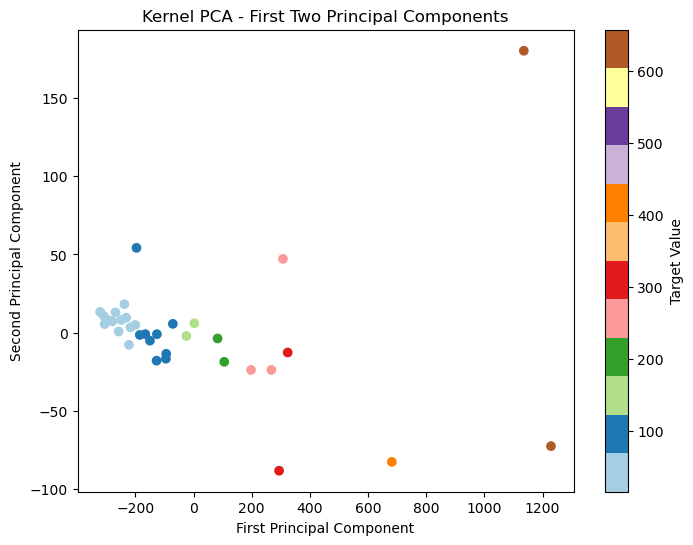

In [673]:
import matplotlib.pyplot as plt

# Perform Kernel PCA on the training data
X_train_kpca = kpca.transform(X_train_k)

# Plot the first two principal components
plt.figure(figsize=(8, 6))
plt.scatter(X_train_kpca[:, 0], X_train_kpca[:, 1], c=y_train_k, cmap=plt.cm.Paired)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('Kernel PCA - First Two Principal Components')
plt.colorbar(label='Target Value')
plt.show()
plt.close()

In [674]:
# from matplotlib.colors import ListedColormap

# # # Perform Kernel PCA on the training data
# # X_train_kpca = kpca.transform(X_train_k)

# # # Plot the first two principal components
# # plt.figure(figsize=(8, 6))
# # plt.scatter(X_train_kpca[:, 0], X_train_kpca[:, 1], c=y_train_k, cmap=plt.cm.coolwarm)

# # Number of components to visualize
# num_components = 8

# # Create a colormap for decision regions
# cmap = ListedColormap(('red', 'green', 'blue'))

# # Create a grid of subplots for all combinations of 2 components
# fig, axes = plt.subplots(num_components, num_components, figsize=(15, 10))

# # Iterate through all combinations of 2 components
# for i in range(num_components):
#     for j in range(num_components):
#         if i != j:  # Skip diagonal plots
#             ax = axes[i, j]
            
#             # Create a meshgrid for the decision boundary
#             x1_min, x1_max = X_set.values[:, i].min() - 1, X_set.values[:, i].max() + 1
#             x2_min, x2_max = X_set.values[:, j].min() - 1, X_set.values[:, j].max() + 1
#             X1, X2 = np.meshgrid(np.arange(start=x1_min, stop=x1_max, step=0.01),
#                                  np.arange(start=x2_min, stop=x2_max, step=0.01))
            
#             # Predict using the kernel pipeline and reshape for contour plot
#             Z = kernel_pipeline.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape)
            
#             # Plot the decision regions on the current subplot
#             ax.contourf(X1, X2, Z, alpha=0.6, cmap=cmap)
#             ax.set_xlim(X1.min(), X1.max())
#             ax.set_ylim(X2.min(), X2.max())
            
#             # Plot the data points on the current subplot
#             for k, cls in enumerate(np.unique(y_set)):
#                 ax.scatter(X_set[y_set == cls, i], X_set[y_set == cls, j], c=cmap(k), label=cls)
            
#             # Set labels and title for the current subplot
#             ax.set_xlabel(f'PC{i + 1}')
#             ax.set_ylabel(f'PC{j + 1}')
#             ax.set_title(f'PC{i + 1} vs. PC{j + 1}')
#             ax.legend()

# # Adjust the layout of subplots
# plt.tight_layout()
# plt.show()
